* This notebook compares performance of some simple ANN models and some Machine Learning models for predictions of MNIST numbers.
* The ML performance measures are mostly taken from 2-Aurélien-Géron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-O’Reilly-Media-2019

* Author: Abhisek Saha

In [22]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [82]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [13]:
# Get the working directory path
import os
current_dir = os.getcwd()# Import mnist data stored in the following path: current directory -> mnist.npz
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data(path=current_dir+'/mnist.npz')

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

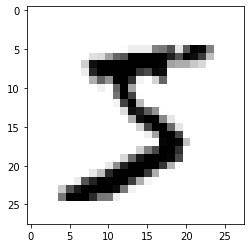

In [30]:
plt.imshow(X_train[0],cmap=mpl.cm.binary)

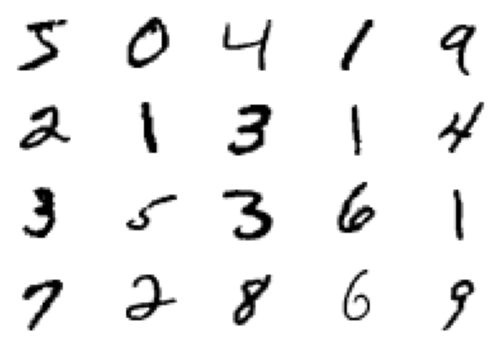

In [34]:
plt.figure(figsize=(9,6))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train[i], cmap=mpl.cm.binary)
    plt.axis('off')

In [39]:
Y_train.shape, X_train.shape

((60000,), (60000, 28, 28))

In [46]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)

In [49]:
X_train_flatten.shape

(60000, 784)

In [50]:
model1 = keras.models.Sequential([
    keras.layers.Dense(10, activation='sigmoid', input_shape=(28*28,)),
    
])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [51]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
hist1 = model1.fit(X_train_flatten, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 9.6300 - accuracy: 0.8388
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 6.1690 - accuracy: 0.8780
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.6392 - accuracy: 0.8829
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.4620 - accuracy: 0.8842
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.2480 - accuracy: 0.8873


* Got 88.7% accuracy without standardization
* Now lets standardize the data and fit

In [53]:
X_train = X_train/255.
X_test = X_test/255.

In [54]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)

In [55]:
hist1_standard = model1.fit(X_train_flatten, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2981 - accuracy: 0.8244
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8995 - accuracy: 0.8660
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6191 - accuracy: 0.8831
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4521 - accuracy: 0.8966
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3600 - accuracy: 0.9066


* Now the accuracy has become more than 90%

In [58]:
model1.evaluate(X_test_flatten, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3202 - accuracy: 0.9127


[0.32022133469581604, 0.9126999974250793]

This is: 7


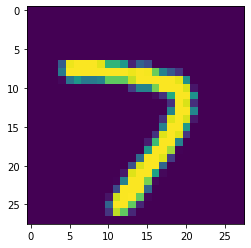

In [73]:
plt.imshow(X_test[17])
pred = model1.predict(X_test_flatten[17].reshape(1,-1))
print("This is:", np.argmax(pred))

In [79]:
np.argmax(pred)

9

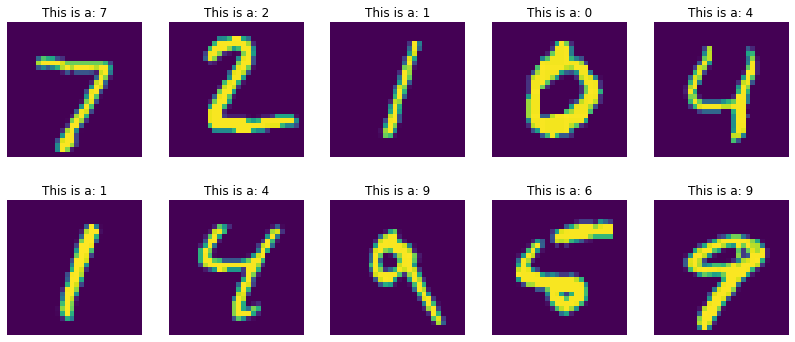

In [81]:
plt.figure(figsize=(14,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i])
    pred = model1.predict(X_test_flatten[i].reshape(1,-1))
    plt.title("This is a: {}".format(np.argmax(pred)))
    plt.axis('off')
plt.show()

In [107]:
pred1 = model1.predict(X_test_flatten) 


In [117]:
y_predicted = [np.argmax(i) for i in pred1]

In [118]:
print(Y_test[0:5])
print(y_predicted[0:5])

[7 2 1 0 4]
[7, 2, 1, 0, 4]


In [121]:
cm = tf.math.confusion_matrix(labels=Y_test, predictions=y_predicted )
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    1,    0,    4,    8,    1,    2,    0],
       [   0, 1111,    2,    2,    0,    2,    4,    1,   13,    0],
       [  12,   11,  897,   18,   16,    1,   12,   23,   38,    4],
       [   5,    2,   22,  907,    1,   24,    4,   16,   18,   11],
       [   2,    3,    4,    0,  900,    0,   11,    2,    7,   53],
       [  12,    7,    3,   37,   12,  760,   16,   11,   24,   10],
       [  18,    4,    7,    1,    8,   14,  902,    1,    3,    0],
       [   2,   14,   21,    3,    9,    0,    0,  943,    3,   33],
       [  11,   11,   10,   21,   10,   25,   11,   16,  844,   15],
       [  10,    6,    3,   12,   34,   10,    0,   29,    5,  900]],
      dtype=int32)>

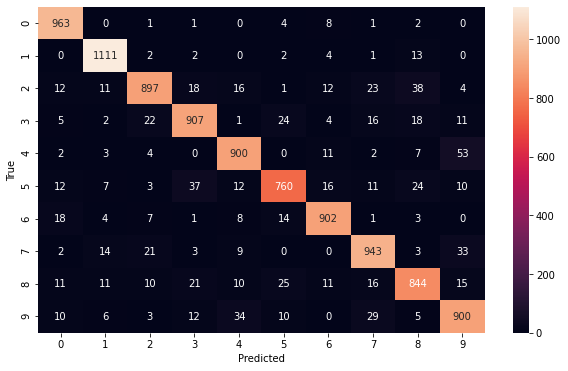

In [127]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Let us use use some hidden layer and see if that improve the accuracy or not

In [129]:
model2 = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(28*28,)),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [130]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [131]:
hist2 = model2.fit(X_train_flatten, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2597 - accuracy: 0.9251
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1119 - accuracy: 0.9665
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0766 - accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0569 - accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0431 - accuracy: 0.9864


* With the new dense hidden layer with 128 units, the accuracy has increased to 98.64%

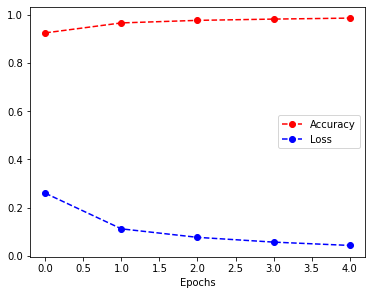

In [133]:
acc = hist2.history['accuracy']
loss = hist2.history['loss']
epochs = range(len(acc))

plt.figure(figsize=(6,4.6))
plt.plot(epochs, acc, 'ro--', label='Accuracy')
plt.plot(epochs, loss, 'bo--', label='Loss')
plt.legend()
plt.xlabel("Epochs")
plt.show()

In [134]:
pred2 = model2.predict(X_test_flatten)
y_predicted2 = [np.argmax(i) for i in pred2]

print(Y_test[0:5])
print(y_predicted2[0:5])

[7 2 1 0 4]
[7, 2, 1, 0, 4]


In [135]:
cm = tf.math.confusion_matrix(labels=Y_test, predictions=y_predicted2)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    0,    1,    1,    0,    2,    1,    1,    1],
       [   0, 1122,    4,    1,    0,    1,    2,    1,    4,    0],
       [   5,    0, 1008,    0,    1,    0,    2,    6,    9,    1],
       [   0,    0,    4,  992,    0,    5,    0,    2,    5,    2],
       [   2,    0,    1,    0,  966,    0,    4,    1,    0,    8],
       [   2,    0,    0,    3,    1,  879,    2,    0,    4,    1],
       [  10,    3,    2,    0,    5,    8,  928,    0,    2,    0],
       [   1,    4,    7,    4,    3,    0,    0,  998,    2,    9],
       [   9,    0,    1,    5,    4,    4,    2,    2,  945,    2],
       [   4,    2,    0,    7,    7,    6,    0,    3,    5,  975]],
      dtype=int32)>

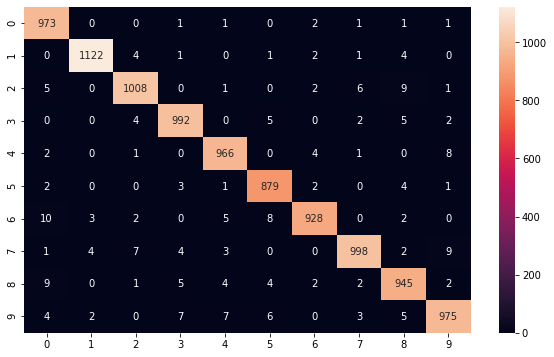

In [136]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# Classifying mnist numbers using SGD

In [141]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1056)>

In [147]:
X_train.shape, X_train_flatten.shape, Y_train.shape, X_test_flatten.shape, Y_test.shape

((60000, 28, 28), (60000, 784), (60000,), (10000, 784), (10000,))

In [150]:
Y_train[0]

5

## Binary Classifier

In [173]:
Number_5 = X_train_flatten[0].reshape(1,-1)

In [161]:
Y_train_5 = (Y_train==5)
Y_test_5 = (Y_test==5)

In [156]:
from sklearn.linear_model import SGDClassifier
clf_sgc = SGDClassifier(max_iter = 1000, tol=1e-3, random_state=42)

In [162]:
X_train.shape, Y_train_5.shape

((60000, 28, 28), (60000,))

In [163]:
clf_sgc.fit(X_train_flatten, Y_train_5)

SGDClassifier(random_state=42)

In [166]:
clf_sgc.predict(X_train_flatten[0].reshape(1,-1))

array([ True])

In [167]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_sgc, X_train_flatten, Y_train_5, cv=3)

array([0.9748, 0.9657, 0.9692])

## Performance measure

### Measuring accuracy using cross-validation

In [210]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
for train_index, test_index in skfolds.split(X_train_flatten, Y_train_5):
    clone_sgc = clone(clf_sgc)
    X_train_fold = X_train_flatten[train_index]
    y_train_fold = Y_train_5[train_index]
    X_test_fold = X_train_flatten[test_index]
    y_test_fold = Y_train_5[test_index]
    
    clone_sgc.fit(X_train_fold, y_train_fold)
    pred_fold = clone_sgc.predict(X_test_fold)
    ncorrect = sum(pred_fold==y_test_fold)
    accuracy = ncorrect/len(y_test_fold)
    print(accuracy)

0.97305
0.97465
0.9749


### Confusion Matrix

In [211]:
from sklearn.model_selection import cross_val_predict
y_pred_binary = cross_val_predict(clf_sgc, X_train_flatten, Y_train_5, cv=3)

In [213]:
from sklearn.metrics import confusion_matrix
cm_5 = confusion_matrix(Y_train_5, y_pred_binary)
cm_5

array([[53613,   966],
       [  840,  4581]])

In [214]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [215]:
precision_score(Y_train_5, y_pred_binary)       #TP/(TP+FP)

0.8258518117901569

In [220]:
cm_5[1,1]/(cm_5[1,1]+cm_5[0,1])

0.8258518117901569

In [221]:
recall_score(Y_train_5, y_pred_binary)     # TP/(TP+FN)

0.8450470392916436

In [222]:
cm_5[1,1]/(cm_5[1,1]+cm_5[1,0])

0.8450470392916436

In [223]:
f1_score(Y_train_5, y_pred_binary)        #TP/( TP + (FP+FN)/2 )

0.8353391684901532

In [226]:
cm_5[1,1]/(cm_5[1,1] + (cm_5[0,1]+cm_5[1,0])/2 )

0.8353391684901532

* Similar precision and recall suggest that for binary classification the classifier is good both in measuring and discarding the true prediction  and false prediction respectively

### Precision-Recall Curve

In [227]:
y_pred_cv= cross_val_predict(clf_sgc, X_train_flatten, Y_train_5, cv=3, method='decision_function')

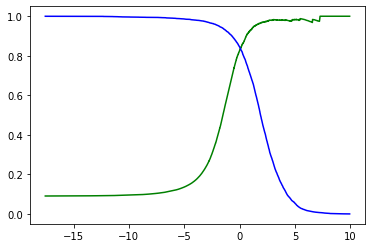

In [228]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(Y_train_5, y_pred_cv)

plt.plot(threshold, precision[:-1], 'g-', label = 'precision')
plt.plot(threshold, recall[:-1], 'b-', label = 'recall')
plt.show()

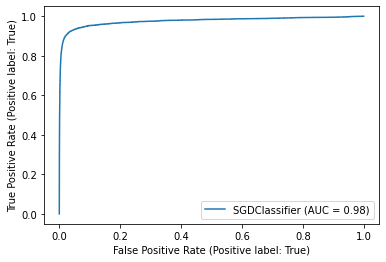

In [236]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf_sgc, X_train_flatten, Y_train_5)
plt.show()

In [238]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
y_pred_cv_rf = cross_val_predict(clf_rf, X_train_flatten, Y_train_5)

In [241]:
clf_rf.fit(X_train_flatten, Y_train_5)

RandomForestClassifier(random_state=42)

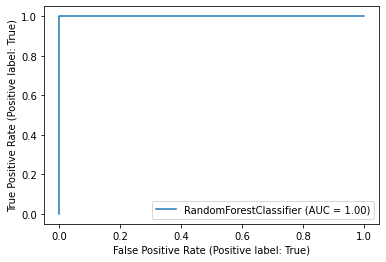

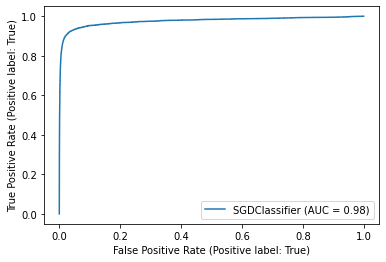

In [242]:
plot_roc_curve(clf_rf, X_train_flatten, Y_train_5)
plot_roc_curve(clf_sgc, X_train_flatten, Y_train_5)
plt.show()

* Random forest has more area under the curve than SGD classifier. So RF is a better classifier in this case

# Multiclass Classification

In [171]:
from sklearn.svm import SVC
clf_svc = SVC(gamma='auto', random_state=42)
clf_svc.fit(X_train_flatten[:1000], Y_train[:1000])

SVC(gamma='auto', random_state=42)

In [174]:
clf_svc.predict(Number_5)

array([5], dtype=uint8)

In [177]:
pred_5 = clf_svc.decision_function(Number_5)
pred_5

array([[ 2.77050547,  1.75891031,  5.00689661,  8.28713452, -0.28657772,
         9.29023012,  0.75243068,  4.87252071,  7.2122829 ,  4.93028125]])

In [178]:
np.argmax(pred_5)

5

In [183]:
pred_svc = clf_svc.predict(X_test_flatten[:1000])

In [184]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test[:1000],pred_svc)
cm

array([[ 78,   0,   0,   0,   1,   3,   2,   1,   0,   0],
       [  0, 126,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,  19,  79,   1,   1,   2,   1,   6,   4,   1],
       [  0,   4,   1,  61,   0,  34,   0,   4,   2,   1],
       [  0,   2,   0,   0,  79,   1,   2,   0,   0,  26],
       [  1,   1,   1,   4,   1,  72,   0,   4,   0,   3],
       [  3,   0,   7,   0,   7,   5,  65,   0,   0,   0],
       [  0,   7,   4,   0,   3,   0,   0,  81,   0,   4],
       [  2,   3,   3,   4,   2,   9,   1,   4,  55,   6],
       [  0,   1,   0,   1,   6,   2,   0,   4,   2,  78]])

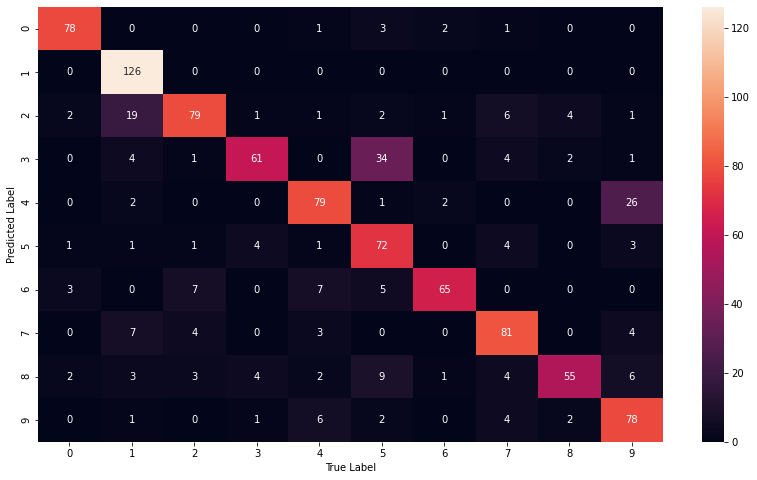

In [186]:
plt.figure(figsize=(14,8))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel("Predicted Label")
plt.xlabel("True Label")
plt.show()

In [188]:
from sklearn.multiclass import OneVsRestClassifier
clf_ovr = OneVsRestClassifier(SVC(gamma='auto', random_state=42))
clf_ovr.fit(X_train_flatten[:1000],Y_train[:1000])

OneVsRestClassifier(estimator=SVC(gamma='auto', random_state=42))

In [199]:
clf_ovr.predict(X_test_flatten[4].reshape(1,-1))

array([4], dtype=uint8)

In [200]:
Y_test[4]

4

In [202]:
np.argmax(clf_ovr.decision_function(X_test_flatten[4].reshape(1,-1)))

4

In [203]:
cross_val_score(clf_ovr, X_train_flatten[:5000], Y_train[:5000], cv=3, scoring='accuracy')

array([0.85242951, 0.88182364, 0.8787515 ])

In [204]:
cross_val_score(clf_svc, X_train_flatten[:5000], Y_train[:5000], cv=3, scoring='accuracy')

array([0.89082184, 0.90941812, 0.90216086])